# Project Objective

- The provided dataset contain the following columns
    - Thickness (ft)
    - Bulk Density gg/cc)
    - Resistivity (ohmsm0
    - Effective Porosity (fraction)
    - Clay Volume (fraction)
    - Water Saturation (fraction)
    - TOC - Top of Cement (fraction)
  * The target variable of column is the Top Of Cement (TOC), we are to use the other features to predict TOC using machine learning.

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset

df = pd.read_excel('TOC_Prediction_Dataset.xlsx')

In [3]:
# view the first five rows of the dataset
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [4]:
### check number of rows and number of column
df.shape

(987, 7)

In [5]:
# check columns
df.columns

Index(['Thickness_ft', 'Bulk Density_gg per cc', 'Resistivity_ohmsm',
       'Effective Porosity_Fraction', 'Clay Volume_ Fraction',
       'Water Saturation_Fraction', 'TOC_Fraction'],
      dtype='object')

In [6]:
#check columns data type
df.dtypes

Thickness_ft                   float64
Bulk Density_gg per cc         float64
Resistivity_ohmsm              float64
Effective Porosity_Fraction    float64
Clay Volume_ Fraction          float64
Water Saturation_Fraction      float64
TOC_Fraction                   float64
dtype: object

- All the columns are numerical variables

In [7]:
# check missing values
df.isna().sum()

Thickness_ft                   0
Bulk Density_gg per cc         0
Resistivity_ohmsm              0
Effective Porosity_Fraction    0
Clay Volume_ Fraction          0
Water Saturation_Fraction      0
TOC_Fraction                   0
dtype: int64

- There are no missing values in the data

In [8]:
# descriptive statistics
df.describe()


,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,150.448933,2.423001,3.892432,0.061492,0.271257,0.435876,0.052630
std,52.452284,0.019059,1.342193,0.014805,0.045289,0.080023,0.005062
min,50.218753,2.386117,1.680451,0.017432,0.153118,0.230041,0.030830
25%,123.462354,2.409469,3.120852,0.051250,0.238607,0.372234,0.051026
50%,141.662622,2.422639,3.650354,0.061158,0.264785,0.442414,0.053662
75%,166.707110,2.433418,4.319585,0.072289,0.303776,0.490972,0.056100
max,475.992627,2.540608,15.970625,0.096054,0.413083,0.683304,0.060907


- The above table gives the summary of the descriptive statistics of the data
- There might be some outliers in the 'Thickness_ft', 'Resistivity_ohmsm' because of how big their maximum values are.

# EDA

#### Distribution of each using histplot

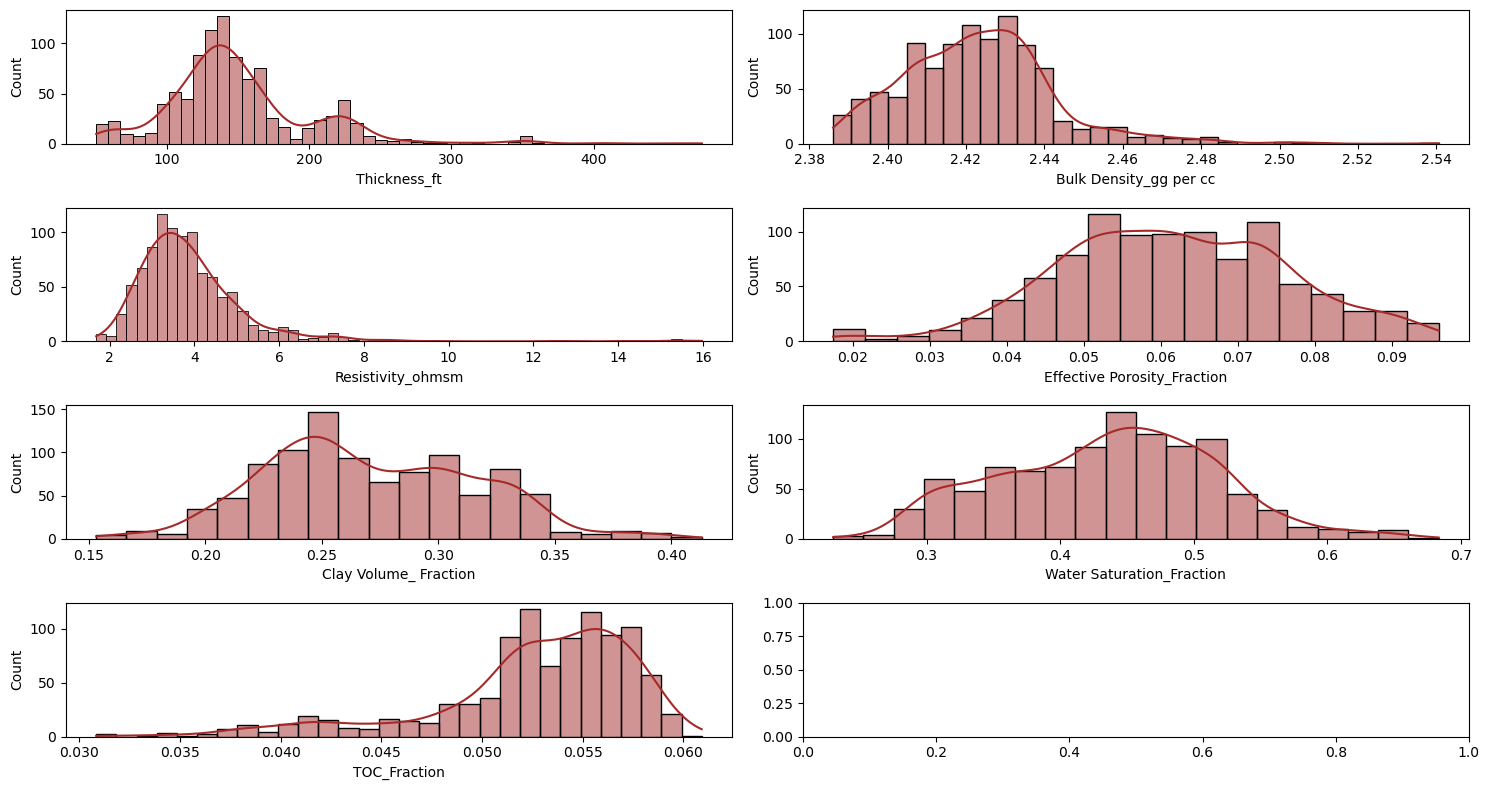

In [10]:
# checking distribution of data using histplot

fig,ax =plt.subplots(4,2, figsize=(15,8))

sns.histplot(x=df['Thickness_ft'] ,data=df, ax=ax[0,0],color='brown',kde=True)
sns.histplot(x=df['Bulk Density_gg per cc'] ,data=df, ax=ax[0,1],color='brown',kde=True)
sns.histplot(x=df['Resistivity_ohmsm'] ,data=df, ax=ax[1,0],color='brown',kde=True)
sns.histplot(x=df['Effective Porosity_Fraction'] ,data=df, ax=ax[1,1],color='brown',kde=True)
sns.histplot(x=df['Clay Volume_ Fraction'] ,data=df, ax=ax[2,0],color='brown',kde=True)
sns.histplot(x=df['Water Saturation_Fraction'] ,data=df, ax=ax[2,1],color='brown',kde=True)
sns.histplot(x=df['TOC_Fraction'] ,data=df, ax=ax[3,0],color='brown',kde=True)
plt.tight_layout()
plt.interactive(True)
plt.show()

- From the above hisplot:
- Thickness_ft,	Bulk Density_gg per cc,Resistivity_ohmsm are skewed to the right	
- Clay volume_fraction, effective Porosity_fraction and water Saturation_fraction are distributed nearly to normal
- The target column, TOC_Fraction is skewed to the left

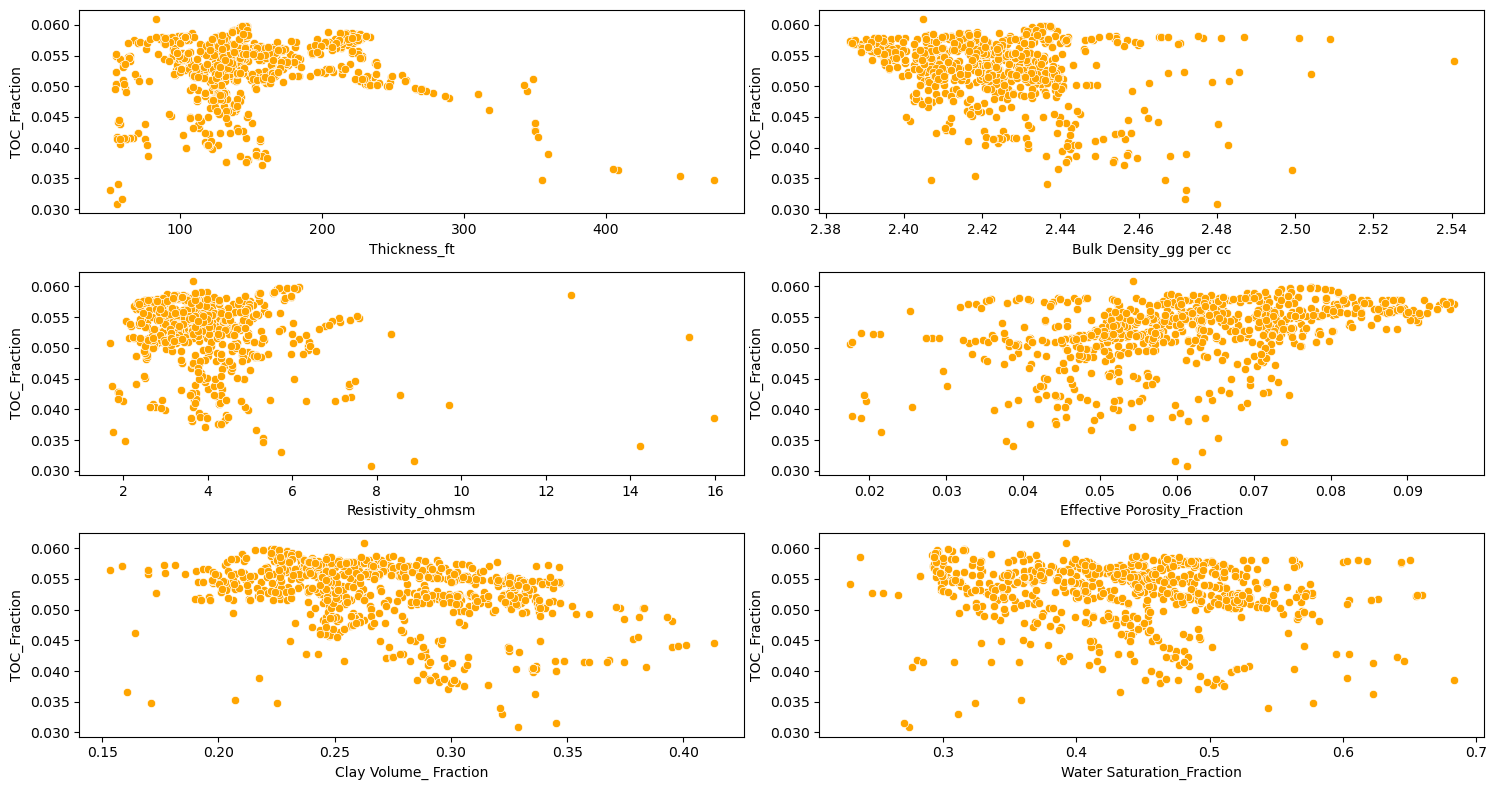

In [12]:
# checking the scatter of data using scatterplot

fig,ax =plt.subplots(3,2, figsize=(15,8))

sns.scatterplot(x=df['Thickness_ft'],y=df['TOC_Fraction'] ,data=df, ax=ax[0,0],color='orange')
sns.scatterplot(x=df['Bulk Density_gg per cc'],y=df['TOC_Fraction'] ,data=df, ax=ax[0,1],color='orange')
sns.scatterplot(x=df['Resistivity_ohmsm'],y=df['TOC_Fraction'] ,data=df, ax=ax[1,0],color='orange')
sns.scatterplot(x=df['Effective Porosity_Fraction'],y=df['TOC_Fraction'] ,data=df, ax=ax[1,1],color='orange')
sns.scatterplot(x=df['Clay Volume_ Fraction'],y=df['TOC_Fraction'] ,data=df, ax=ax[2,0],color='orange')
sns.scatterplot(x=df['Water Saturation_Fraction'],y=df['TOC_Fraction'] ,data=df, ax=ax[2,1],color='orange')
plt.tight_layout()
plt.interactive(True)
plt.show()

- From the above scatter plots:
    - All the feature columns are inversely proportional to the TOC, except Effective Porosity.
    - Thickness has little or no relationship with TOC.
    

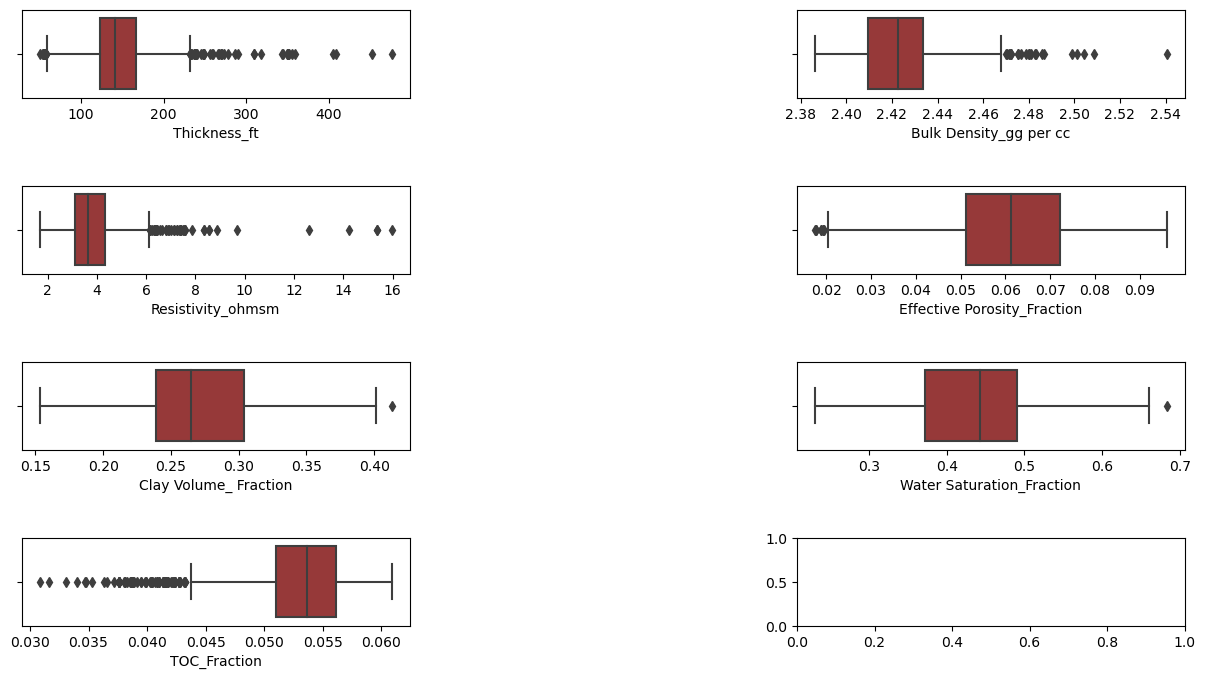

In [13]:
# checking distribution of data using histplot
num_col =df.select_dtypes(exclude='object')
fig,ax =plt.subplots(4,2, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //2, idx % 2
    sns.boxplot(x=num_col ,data=df, ax=ax[row,col],color='brown')
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- From the above boxplots, all the columns contain outliers

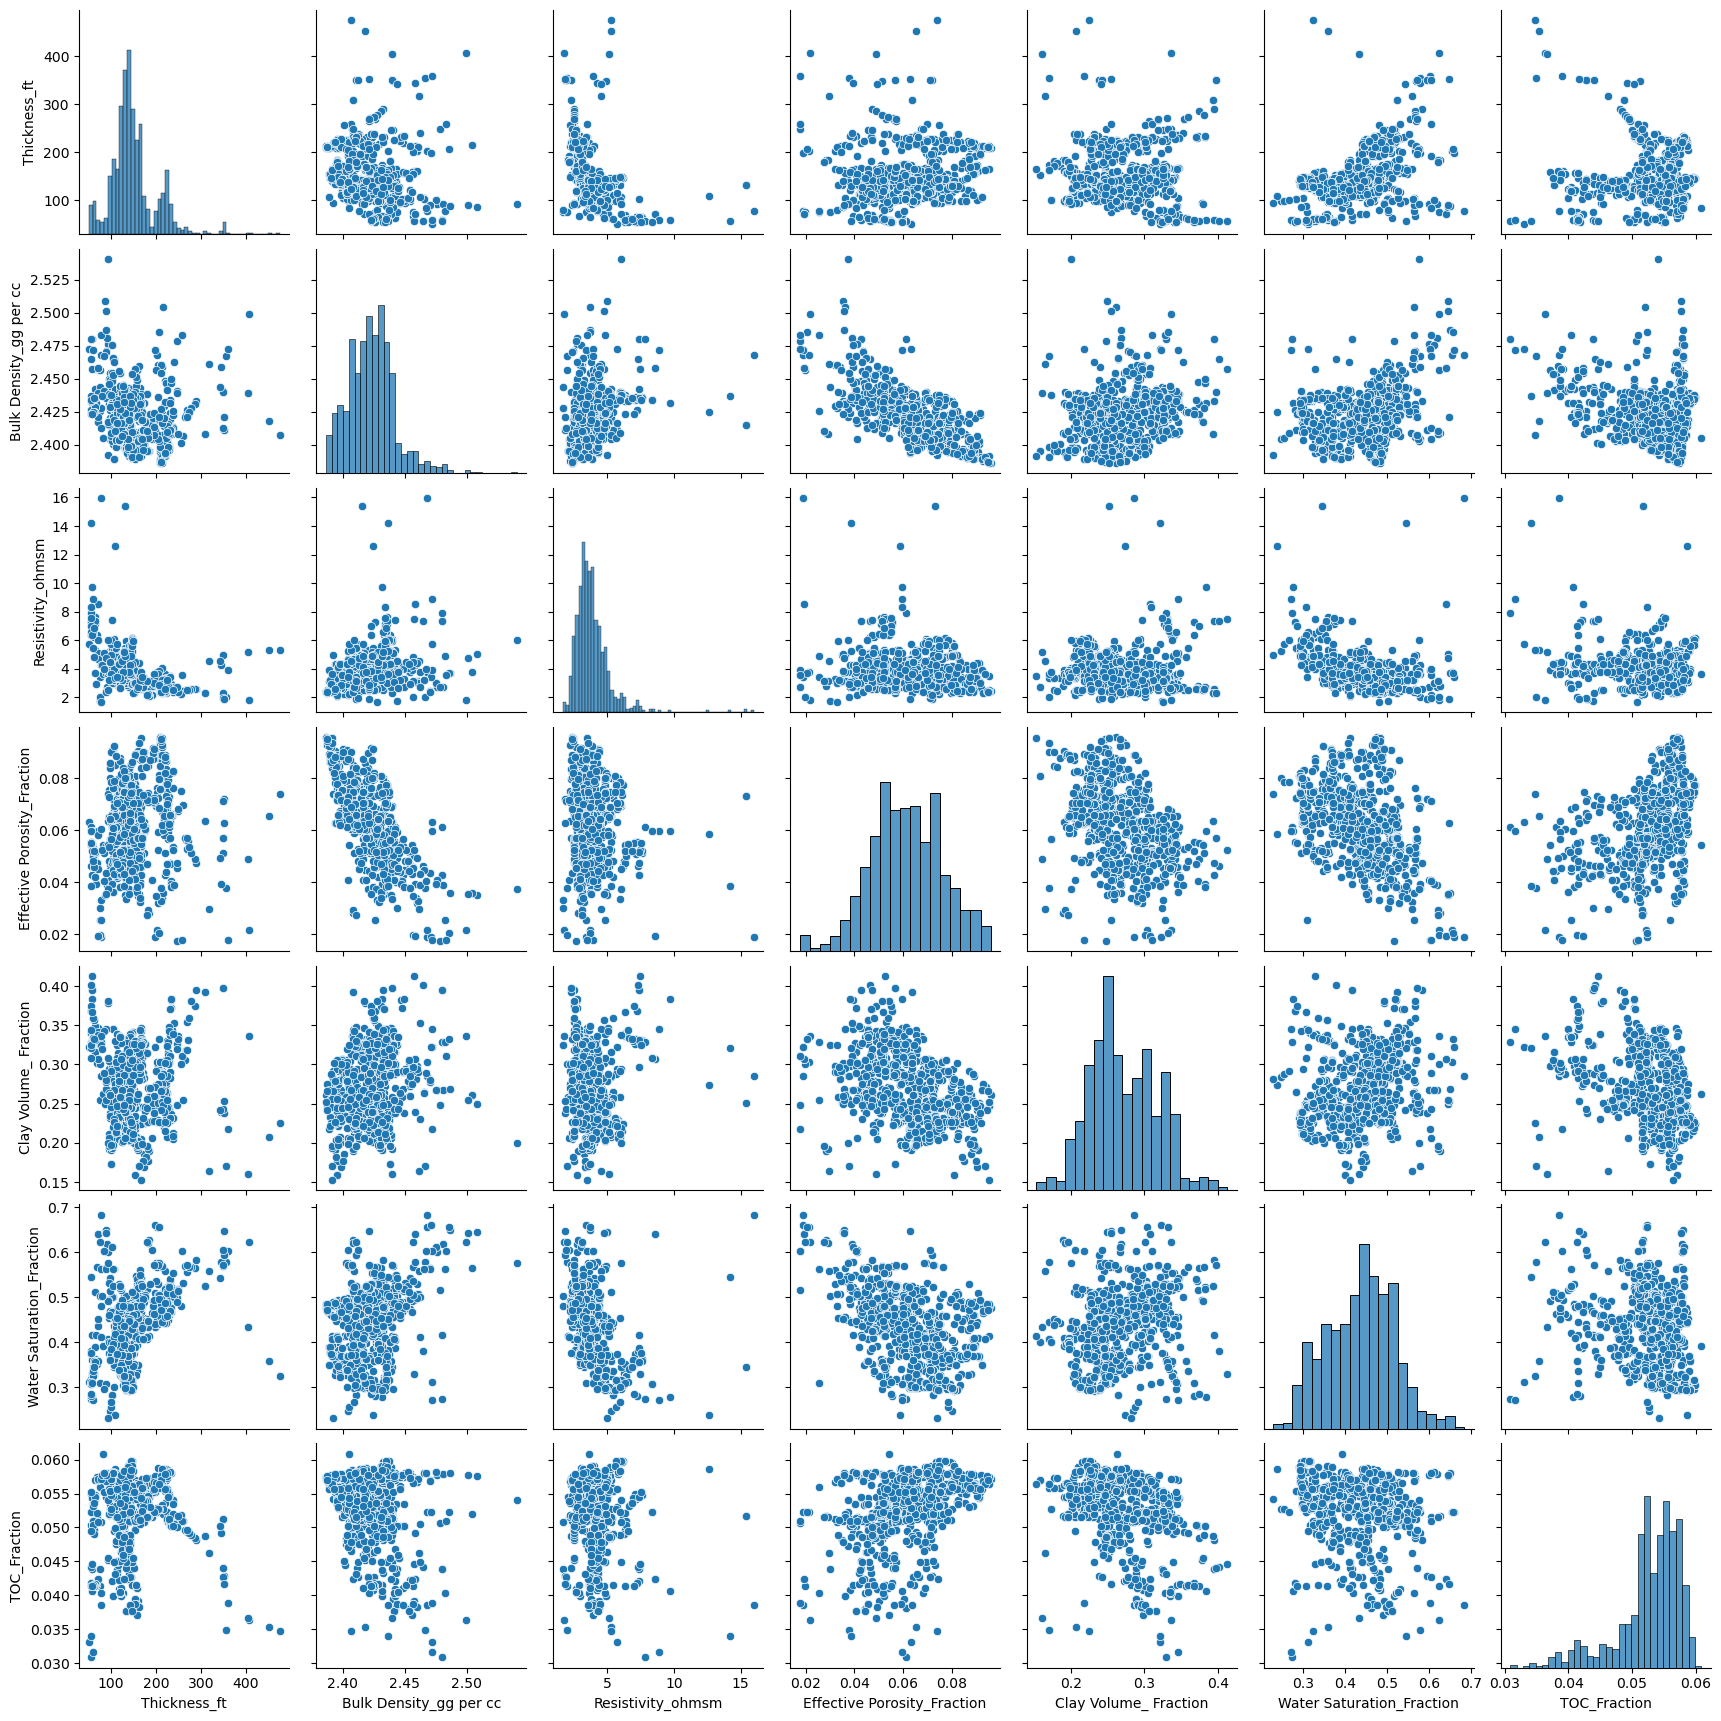

In [15]:
# Check how all the columns relate with each other
sns.pairplot(df)

- The outliers in the data has made the scatterplot seem there is no relationship


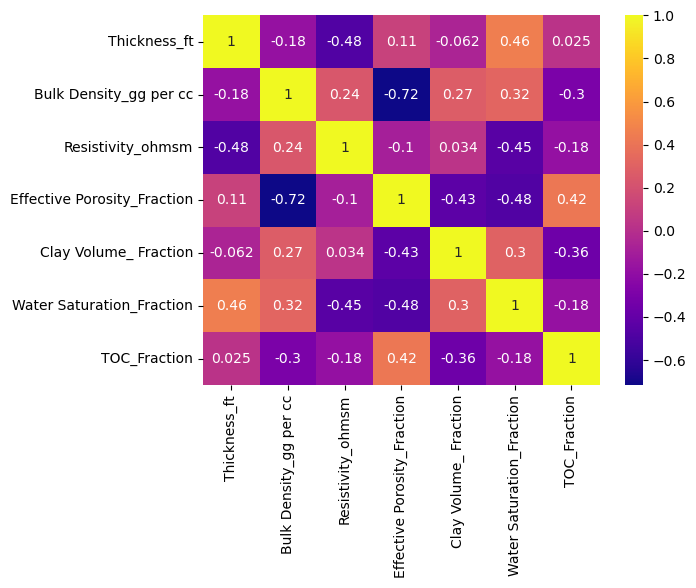

In [14]:
# check correlation of the data
corr =df.corr()
sns.heatmap(corr,annot=True,cmap='plasma')
plt.savefig("TOC_Fraction.jpg")
plt.show()

- From the above correlation heatmap;
- Only and Thickness_ft and effective Porosity_fraction is correlating positively with TOC_Fraction
- The rest of the columns correlate negatively with the target column

# Feature Engineering

In [15]:
## removing outliers
def remove_outliers(data):
    for col in data.columns:
        q1,q3 = data[col].quantile([0.25,0.75])
        iqr = q3-q1
        lw = q1-1.5*iqr
        up = q3+1.5*iqr
        data[col] = np.where(data[col]<lw,lw,data[col])
        data[col] = np.where(data[col]>up, up,data[col])
        
    return data

df = remove_outliers(df)

# Split the data

In [16]:
# assigning the feature values to X and target value to Y

X = df.drop(['TOC_Fraction'],axis=1)
Y = df['TOC_Fraction']

In [17]:
X.sample(3)

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction
36,142.037769,2.423364,3.940624,0.057280,0.298408,0.443577
770,145.867614,2.432569,5.231015,0.074746,0.224410,0.293177
204,131.718738,2.405022,4.699600,0.075221,0.247809,0.368058


In [18]:
Y.sample(3)

648    0.051847
952    0.058064
792    0.043415
Name: TOC_Fraction, dtype: float64

### Normalize the data  and Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
seed = 1000
np.random.seed(seed)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))# scale the data between the range of 0 and 1
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Build Models

In [23]:

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,HistGradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [24]:
# write model building function

def build_model(model):
    model =model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    train_score = print('Train score:',model.score(x_train,y_train))
    test_score = print("Test score:", model.score(x_test,y_test))
    mae = print("MAE:", mean_absolute_error(y_test,model_pred))
    mse = print("MSE: ", mean_squared_error(y_test,model_pred))
    rmse =print("RMSE: ",np.sqrt(mean_squared_error(y_test,model_pred)))
    r2 = print("R2_score: ",r2_score(y_test,model_pred))
    
    return

### ExtraTreesRegressor

In [26]:
build_model(ExtraTreesRegressor())

Train score: 1.0
Test score: 0.9190974846092307
MAE: 0.000583251375000017
MSE:  1.1343999641820017e-06
RMSE:  0.0010650821396408832
R2_score:  0.9190974846092307


## Train and Test model

In [39]:
extra_model = ExtraTreesRegressor(n_estimators=200)
# train the model
extra_model.fit(x_train,y_train)
#test
pred_TOC = extra_model.predict(x_test)

mae = print("MAE:", mean_absolute_error(y_test,pred_TOC))
mse = print("MSE: ", mean_squared_error(y_test,pred_TOC))
rmse =print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_TOC)))
r2 = print("R2_score: ",r2_score(y_test,pred_TOC))
    

MAE: 0.0005612659180871574
MSE:  1.0879922484037364e-06
RMSE:  0.0010430686690739667
R2_score:  0.922407164667894


#### The model is giving R2_SCORE = 0.922
- This means the model is performing well

### RandomForestClassifier

In [25]:
build_model(RandomForestRegressor())

Train score: 0.9729171838351164
Test score: 0.863903276295934
MAE: 0.000874416931249999
MSE:  1.9083228469407433e-06
RMSE:  0.0013814205901682309
R2_score:  0.863903276295934


#### Hyperparameter tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV


In [101]:
params = {"criterion":["poisson","squared_error","absolute_error","friedman_mse"],
         "max_depth":[2,4,5,60,7,80,9,12,11,13,876,908,322],
         "min_samples_split":[1,3,2,4,5,6,7],
         "max_features":["sqrt","log2",None,1,2.1]
         }

In [103]:
tuned_rf = RandomizedSearchCV(RandomForestRegressor(),param_distributions=params,cv=10,verbose=1,random_state=100)
build_model(tuned_rf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Train score: 0.9569430646516232
Test score: 0.777094093235619
MAE: 0.0011109496417730695
MSE:  3.336806372021196e-06
RMSE:  0.001826692741547192
R2_score:  0.777094093235619


### LinearRegression


In [79]:
build_model(LinearRegression())

Train score: 0.2768745297348245
Test score: 0.218569394301929
MAE: 0.0026564135541212843
MSE:  1.1697682947190369e-05
RMSE:  0.0034201875602356034
R2_score:  0.218569394301929


  ### AdaBoostRegressor

In [80]:
build_model(AdaBoostRegressor())

Train score: 0.49675381117924344
Test score: 0.333137968240137
MAE: 0.002508655471791266
MSE:  9.982640250028958e-06
RMSE:  0.003159531650423676
R2_score:  0.333137968240137


### DecisionTreeRegressor

In [81]:
build_model(DecisionTreeRegressor())

Train score: 1.0
Test score: 0.6375530840609906
MAE: 0.0008616619570707071
MSE:  5.425675775847024e-06
RMSE:  0.0023293080036455084
R2_score:  0.6375530840609906
